In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy import stats

PROPS = {
    'boxprops':{'edgecolor':'black', "linewidth":1},
    'medianprops':{'color':'black', "linewidth":1},
    'whiskerprops':{'color':'black', "linewidth":1},
    'capprops':{'color':'black', "linewidth":1},
    'flierprops':{"markerfacecolor":'black', "markeredgecolor":"black", "linewidth":.5,"markersize":1}
}
#sns.set_style('white')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
# set working directory to the directory with input files
cd "/home/aswin/aksharad/share_figure/figure_5"

/home/aswin/aksharad/share_figure/figure_5


In [3]:
## load list of superfams wth both tf and ntf
df_sf_with_ntf=pd.read_csv("/home/aswin/aksharad/paper_files/sf_with_btf_tf_ntf", header=None)
df_sf_with_ntf.columns=["sf"]
df_sf_with_ntf["SFAM"]=df_sf_with_ntf["sf"].str.split("_").str[0]
print(df_sf_with_ntf)

                                                   sf       SFAM
0                    IPR009057_SSF46689_Homeobox-like  IPR009057
1                     IPR009061_SSF46955_Putative_DBD  IPR009061
2                 IPR010919_SSF63763_SAND-like_domain  IPR010919
3        IPR010982_SSF47413_Lambda_repressor-like_DBD  IPR010982
4               IPR010985_SSF47598_Ribbon-helix-helix  IPR010985
5          IPR015300_SSF101936_DNA-bd_pseudobarrel_sf  IPR015300
6               IPR016177_SSF54171_DNA-binding_domain  IPR016177
7     IPR025659_SSF54518_Tubby_C-terminal_domain-like  IPR025659
8                        IPR035975_SSF54957_Viral_DBD  IPR035975
9                      IPR036236_SSF57667_Znf_C2H2_sf  IPR036236
10                    IPR036390_SSF46785_Winged_helix  IPR036390
11                    IPR036576_SSF118290_WRKY_domain  IPR036576
12  IPR036638_SSF47459_Helix-loop-helix_DNA-bindin...  IPR036638
13                         IPR046347_SSF57959_bZIP_sf  IPR046347


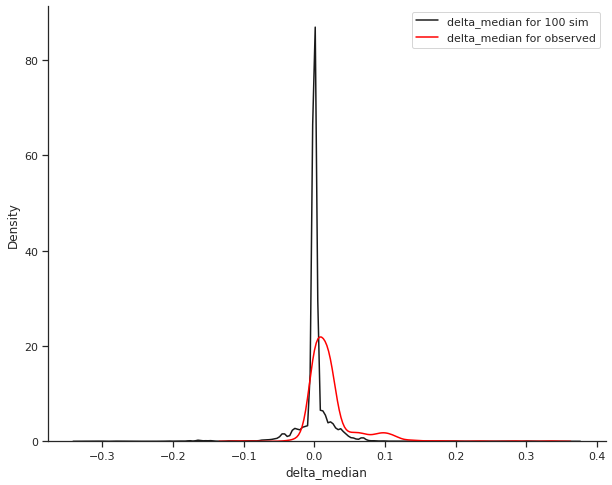

In [4]:
# Figure 5A
### sim extant
df_frac1=pd.DataFrame(columns=["iteration", "TF>nTF", "nTF>TF"])
B=[]
dm=[]
for i in [str(e) for e in range(1,101)]:
    df_pvalse=pd.read_csv("./sim_first_per_path_1/sim_first_emergence_tf_ntf_pval_704_extant_%s"%i, sep="\t")
    df_pvalse=df_pvalse[(df_pvalse.tf_og>=20) & (df_pvalse.ntf_og>=20) ]
    df_pvalse.p_value_greater=df_pvalse.p_value_greater.astype(float)
    df_pvalse.p_value_less=df_pvalse.p_value_less.astype(float)
    df_pvalse["log_pval_g"]=df_pvalse.p_value_greater.apply(lambda x: np.log10(x))
    df_pvalse["log_pval_l"]=df_pvalse.p_value_less.apply(lambda x: np.log10(x))
    df_pvalse["FDR_pval_g"]=stats.false_discovery_control(df_pvalse.p_value_greater)
    df_pvalse["FDR_pval_l"]=stats.false_discovery_control(df_pvalse.p_value_less)
    df_pvalse["delta_median"]=df_pvalse.median_tf-df_pvalse.median_ntf
    df_frac1.loc[len(df_frac1)]=[i,len(df_pvalse[df_pvalse.FDR_pval_g<10**-3])/len(df_pvalse),len(df_pvalse[df_pvalse.FDR_pval_l<10**-3])/len(df_pvalse)]
    B.append(np.median(df_pvalse.delta_median))
    dm.append(df_pvalse.delta_median.tolist())
    #print(df_pvalse["delta_median"].tolist())
dm=[item for sublist in dm for item in sublist]

### observed extant

df_pvale=pd.read_csv("./euBac_18S_tf_ntf_comparitive_emergence", sep="\t")
df_pvale=df_pvale[(df_pvale.tf_og>=20) & (df_pvale.ntf_og>=20) ]
df_pvale.p_value_greater=df_pvale.p_value_greater.astype(float)
df_pvale.p_value_less=df_pvale.p_value_less.astype(float)
df_pvale["log_pval_g"]=df_pvale.p_value_greater.apply(lambda x: np.log10(x))
df_pvale["log_pval_l"]=df_pvale.p_value_less.apply(lambda x: np.log10(x))
df_pvale["FDR_pval_g"]=stats.false_discovery_control(df_pvale.p_value_greater)
df_pvale["FDR_pval_l"]=stats.false_discovery_control(df_pvale.p_value_less)
df_pvale["delta_median"]=df_pvale.median_tf-df_pvale.median_ntf

fig, ax = plt.subplots(figsize=(10, 8))
#sns.kdeplot(df_pvala.delta_median)
sns.kdeplot(dm, color="k")
sns.kdeplot(df_pvale.delta_median, color="red")
plt.legend(["delta_median for 100 sim","delta_median for observed"])

In [5]:
trees=[["euBac_18S",704], ["euArch_18S",703],["18S_archaea", 705],["euBac_concat",423]]

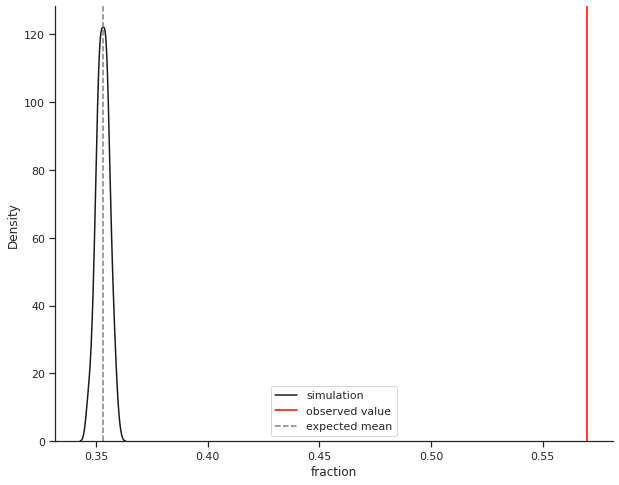

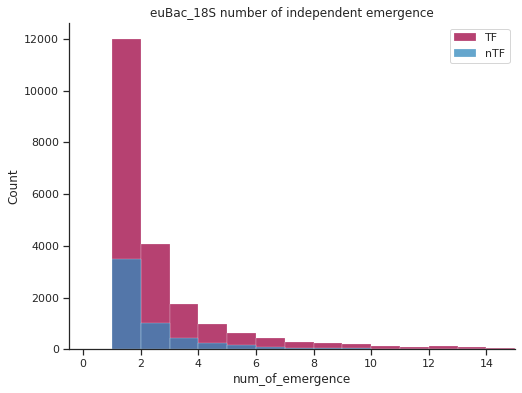

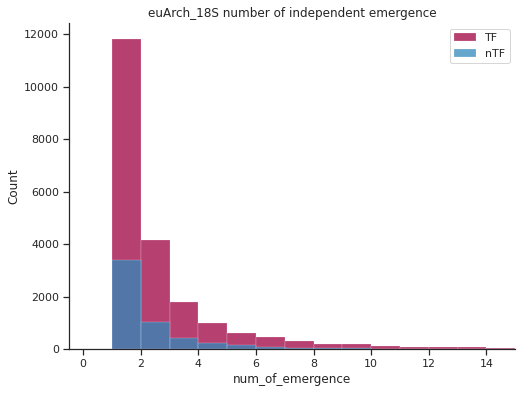

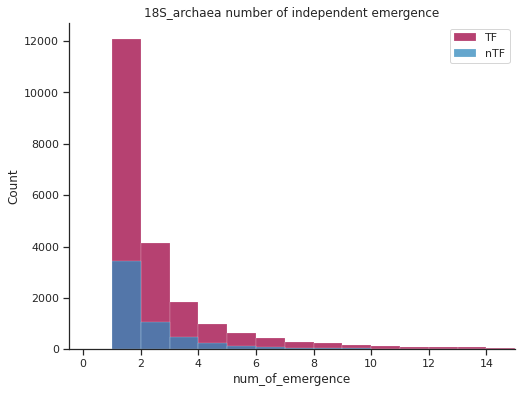

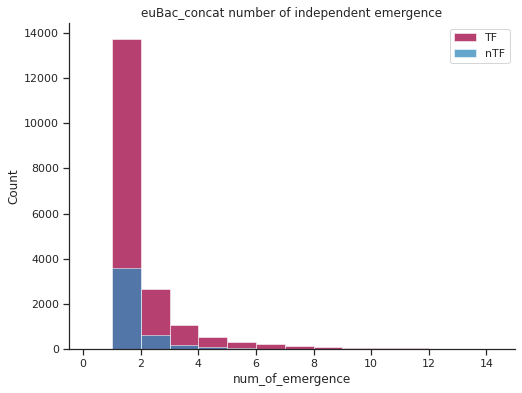

In [6]:
#Figure 5B
# simulation fraction of independent emergence
df_fe=pd.read_csv("./sim_fraction_independent_emergence_100", sep="\t", header=None)
df_fe.columns=["sim", "no of fe","total_og", "fraction"]

fig, ax = plt.subplots(figsize=(10, 8))
sns.kdeplot(df_fe.fraction, color="k")
ax.axvline(x = .57,color = "red")
ax.axvline(x =np.mean(df_fe.fraction) ,color = "grey", linestyle="dashed")
plt.legend(["simulation", "observed value", "expected mean"])

# Figure 5B inset and S4 A,B,C
for tree in trees:
    df_prot=pd.read_csv("./%s_OG_number_of_emergence"%tree[0], sep="\t", header=None)
    df_prot.columns=["OG_ID","num_of_emergence","category","SFAM"]
    df_prot=pd.merge(df_prot, df_sf_with_ntf, on="SFAM")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(df_prot[df_prot['category']=="tf"].num_of_emergence, color="#9e0142" , binwidth=1)
    sns.histplot(df_prot[df_prot['category']=="ntf"].num_of_emergence, color="#3288bd", binwidth=1)
    plt.xlim(-0.5, 15)
    plt.legend(["TF","nTF"])
    plt.title("%s number of independent emergence"%tree[0])


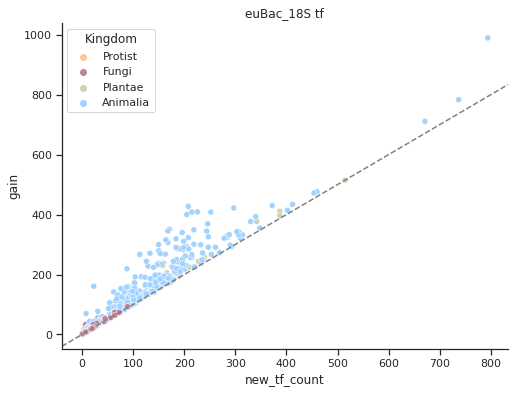

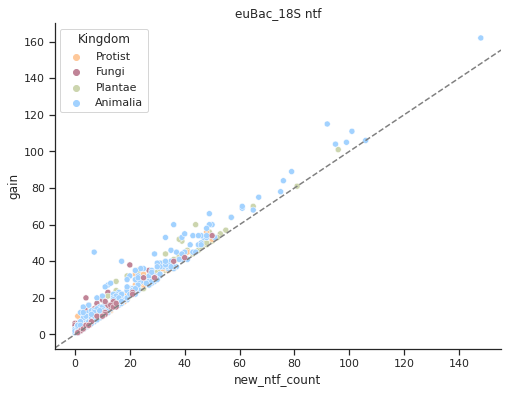

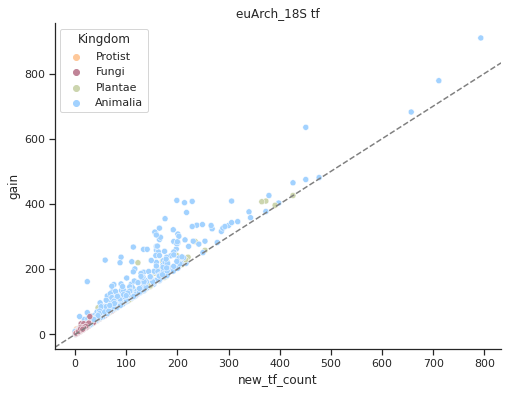

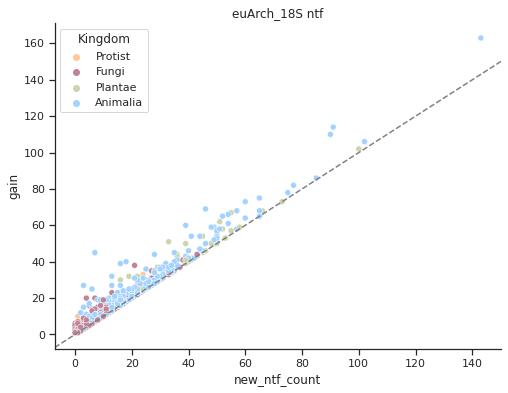

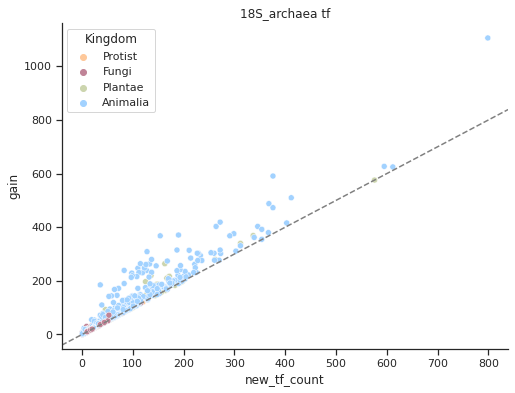

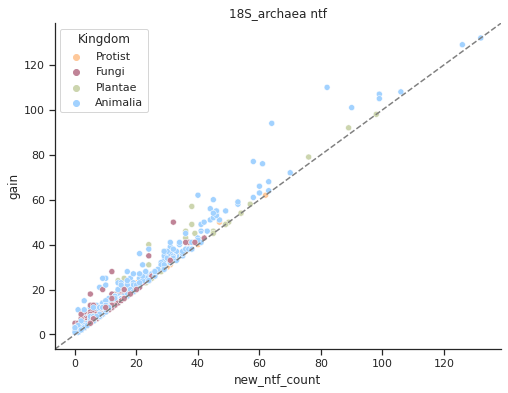

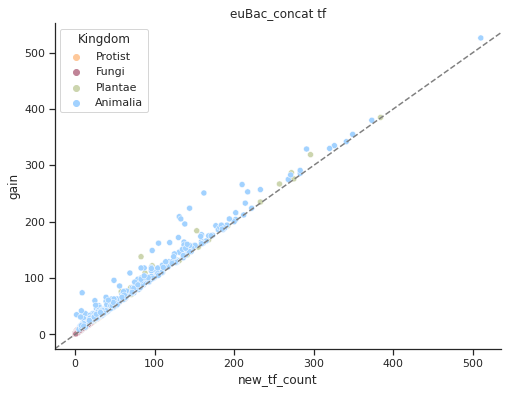

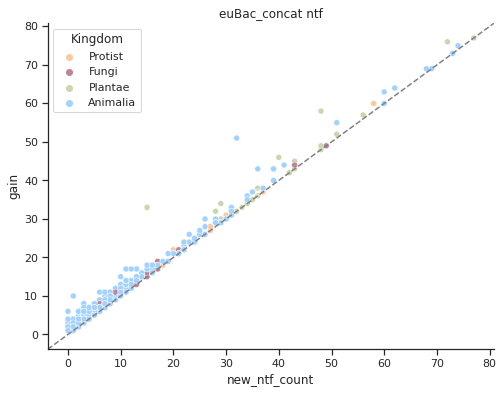

In [7]:
#Figure 5C,D,E,F S4 D,E,F,G
#new emergence vs gain of tf and nTF OGs
for tree in trees:
    gl=pd.read_csv("./%s_new_OG_gain_loss"%tree[0], sep="\t")
    ##tf
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=gl[gl.category=="tf"], x="new_tf_count", y="gain", hue="Kingdom",  palette=["#fec89a", "#c08497", "#ccd5ae", "#a2d2ff"], hue_order=["Protist","Fungi","Plantae","Animalia"])
    ax.axline((0, 0), (1, 1), linestyle="dashed", color='grey')
    plt.title("%s tf"%tree[0])
    ##ntf
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=gl[gl.category=="ntf"], x="new_ntf_count", y="gain", hue="Kingdom",  palette=["#fec89a", "#c08497", "#ccd5ae", "#a2d2ff"], hue_order=["Protist","Fungi","Plantae","Animalia"])
    ax.axline((0, 0), (1, 1), linestyle="dashed", color='grey')
    plt.title("%s ntf"%tree[0])


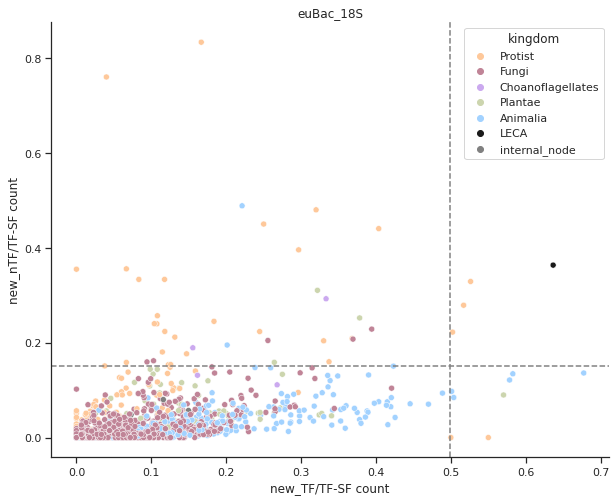

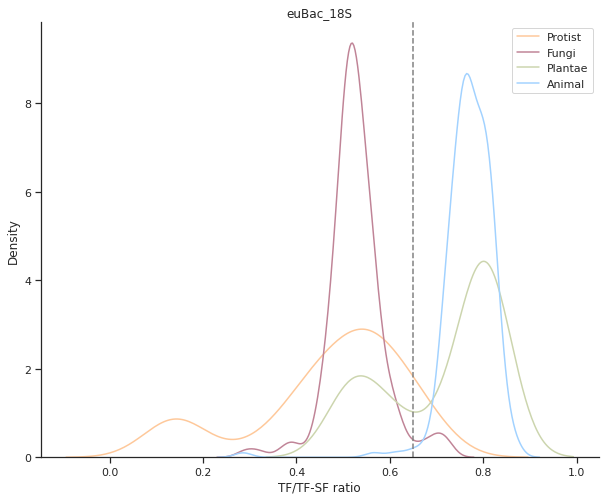

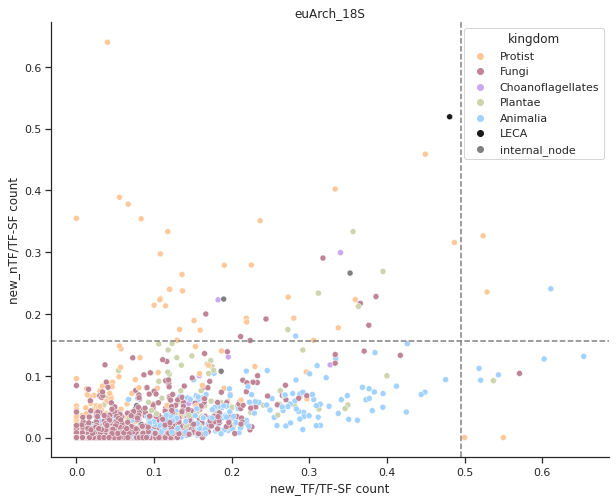

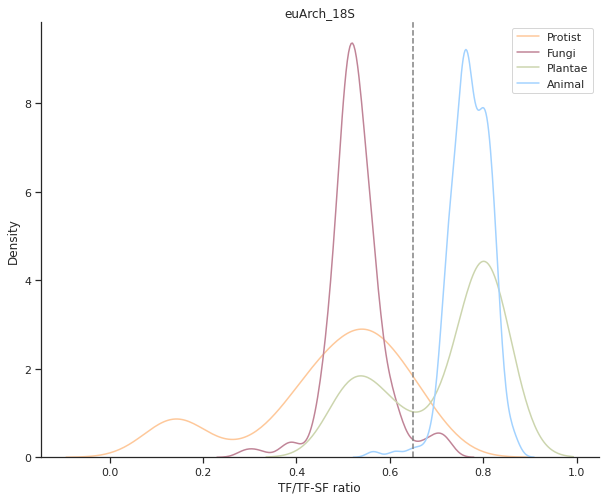

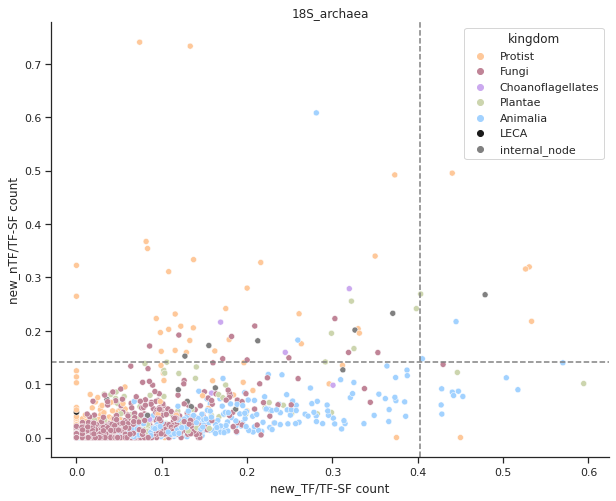

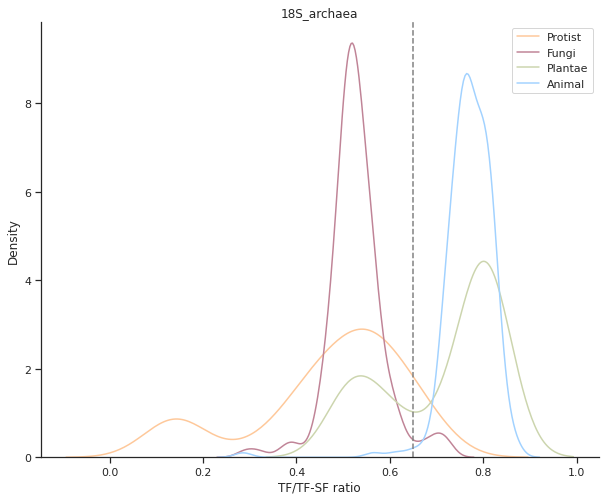

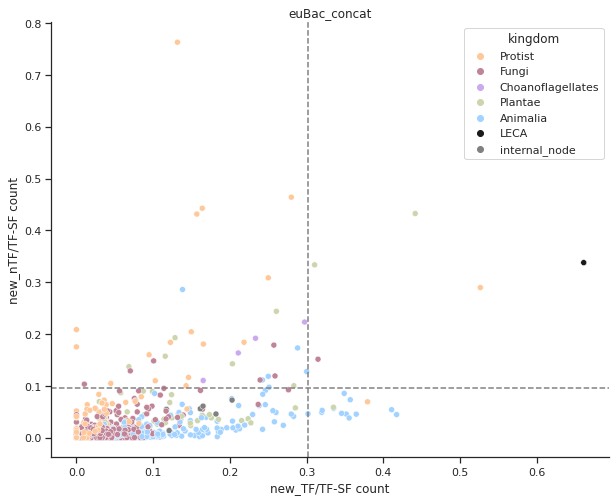

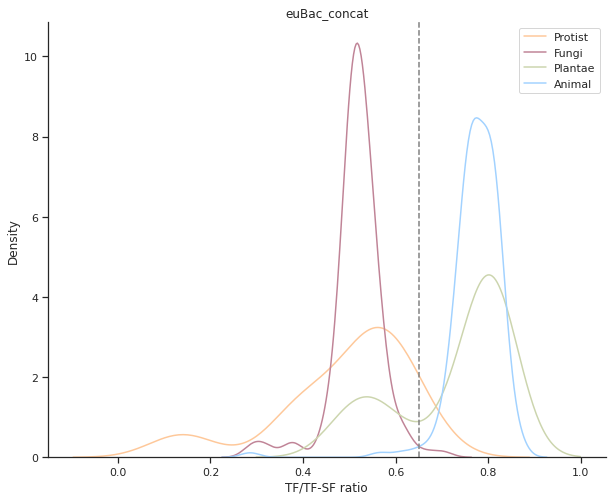

In [8]:
# Figure 5G,H and S4 H,I
for tree in trees:
    df=pd.read_csv("./%s_new_and_total_tf_ntf_count"%tree[0], sep="\t")
    tf_outlier=np.quantile(df["new_TF/TF-SF count"], 0.75) + (3*(stats.iqr(df["new_TF/TF-SF count"])))
    ntf_outlier=np.quantile(df["new_nTF/TF-SF count"], 0.75) + (3*(stats.iqr(df["new_nTF/TF-SF count"])))

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=df[(df.kingdom!="Archaea")&(df.kingdom!="Root")],x=df["new_TF/TF-SF count"], y=df["new_nTF/TF-SF count"], hue="kingdom", hue_order=["Protist","Fungi", "Choanoflagellates", "Plantae","Animalia", "LECA","internal_node"],
                palette=["#fec89a","#c08497","#cba9ef", "#ccd5ae","#a2d2ff", "k","grey"])
    ax.axhline(y = ntf_outlier,color = "grey", linestyle = "dashed")
    ax.axvline(x = tf_outlier,color = "grey", linestyle = "dashed")
    plt.title("%s"%tree[0])

    # Figure S5 A,B,C,D
    dft=df[df.node<=tree[1]]
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.kdeplot(dft[dft.kingdom=="Protist"]["TF/TF-SF ratio"], color="#fec89a")
    sns.kdeplot(dft[dft.kingdom=="Fungi"]["TF/TF-SF ratio"], color="#c08497")
    sns.kdeplot(dft[dft.kingdom=="Plantae"]["TF/TF-SF ratio"], color="#ccd5ae")
    sns.kdeplot(dft[dft.kingdom=="Animalia"]["TF/TF-SF ratio"], color="#a2d2ff")
    ax.axvline(x = 0.65,color = "grey", linestyle = "dashed")
    plt.legend(["Protist", "Fungi","Plantae","Animal"])
    plt.title("%s"%tree[0])
